In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Convolution2D,Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras import optimizers

In [16]:
tf.__version__

'2.18.0'

In [33]:
# Root folder of the dataset
# Dataset URL-> https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
datasetFolderName='chest_xray'
# Model file name for saving
MODEL_FILENAME="imageClassificationModel.keras"
# Input image dimensions
img_rows, img_cols, numOfChannels =  100, 100, 1
# Train, Validation, and Test data path
train_path=datasetFolderName+'/train/'
validation_path=datasetFolderName+'/val/'
test_path=datasetFolderName+'/test/'

In [35]:
def showResults(test, pred):
    target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(test, pred)
    print(cm)    

In [37]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                # validation_split=0.1,
                # shear_range=0.05,
            	# horizontal_flip=True,
        		# rotation_range=30,
        		# zoom_range=0.20,
                # zca_whitening=True,
            	fill_mode="nearest"
                )
validation_datagen = ImageDataGenerator(
                rescale=1./255,
                # shear_range=0.05,
            	# horizontal_flip=True,
        		# rotation_range=30,
        		# zoom_range=0.20,
                # zca_whitening=True,
            	fill_mode="nearest"
                )
test_datagen = ImageDataGenerator(rescale=1./255)

activationFunction='relu'
batch_size = 16
epoch=20

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode="grayscale")

validation_generator = train_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode="grayscale")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode=None,  # only data, no labels
        shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [39]:
def getModel():
    model = Sequential()
    
    model.add(Conv2D(100, kernel_size = (5, 5), activation=activationFunction, input_shape=(img_rows, img_cols, numOfChannels)))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(50, kernel_size=(3,3), activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(50, kernel_size=(3,3), activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(Dense(50, activation=activationFunction))
    model.add(Dense(2, activation = 'softmax'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = getModel()

In [41]:
checkpoint = ModelCheckpoint(MODEL_FILENAME,  # model filename
                             monitor='loss',
                             verbose=1, # verbosity - 0 or 1
                             save_best_only=True, 
                             mode='auto') 
early_stopping = EarlyStopping(monitor='loss',
                               patience=5,
                               verbose=1,
                               mode='auto')
# fit model
history = model.fit(train_generator, 
                    epochs=epoch,
                    validation_data=validation_generator, 
                    callbacks=[checkpoint, early_stopping])

Epoch 1/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.7933 - loss: 0.4435
Epoch 1: loss improved from inf to 0.31242, saving model to imageClassificationModel.keras
326/326 ━━━━━━━━━━━━━━━━━━━━ 150s 443ms/step - accuracy: 0.7935 - loss: 0.4431 - val_accuracy: 0.6250 - val_loss: 0.6129
Epoch 2/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.9341 - loss: 0.1626
Epoch 2: loss improved from 0.31242 to 0.14865, saving model to imageClassificationModel.keras
326/326 ━━━━━━━━━━━━━━━━━━━━ 207s 459ms/step - accuracy: 0.9341 - loss: 0.1626 - val_accuracy: 0.6250 - val_loss: 0.6148
Epoch 3/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9528 - loss: 0.1231
Epoch 3: loss improved from 0.14865 to 0.12656, saving model to imageClassificationModel.keras
326/326 ━━━━━━━━━━━━━━━━━━━━ 143s 437ms/step - accuracy: 0.9528 - loss: 0.1232 - val_accuracy: 0.6875 - val_loss: 0.4976
Epoch 4/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.9648 - loss: 0.1022
Epoc

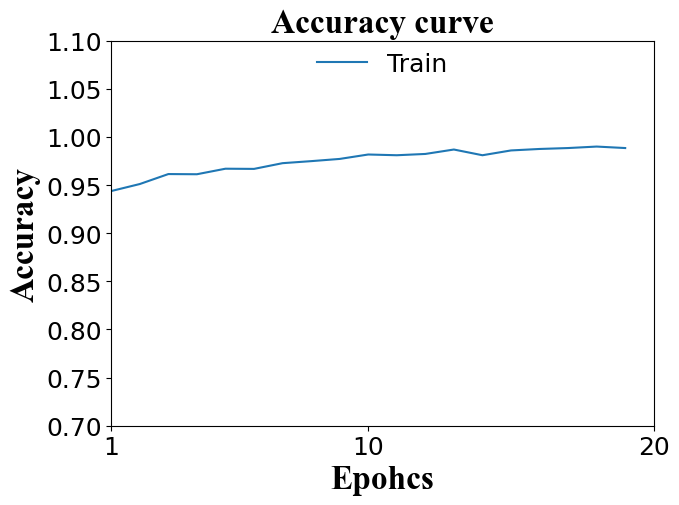

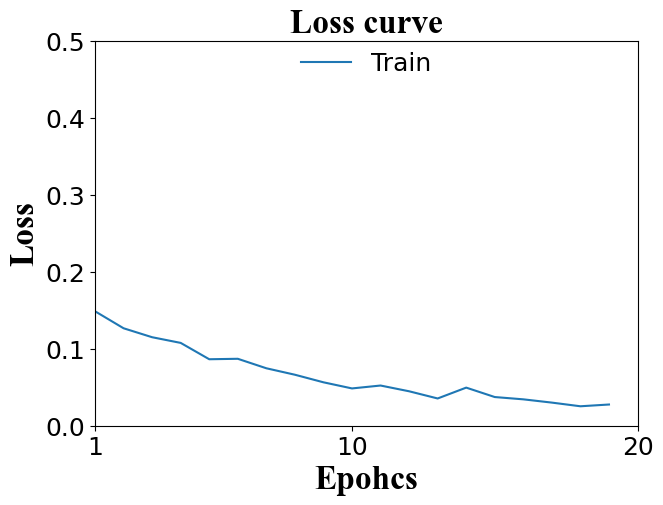

In [45]:
# Plot validation accuracy and loss
history.history['loss']
fig=plt.rc('figure', figsize=(7, 5))

fontLabels = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 24,
        }

axisLabelFont=18
#Validation Accuracy Plot   
plt.xticks([1,10,20], fontsize=axisLabelFont)
plt.yticks(fontsize=axisLabelFont)
plt.ylim(ymin=0.7,ymax=1.1) 
plt.xlim(xmin=1, xmax=20)
plt.plot(history.history['accuracy'])
plt.title('Accuracy curve', fontdict=fontLabels)
plt.ylabel('Accuracy', fontdict=fontLabels)
plt.xlabel('Epohcs', fontdict=fontLabels)
plt.legend(['Train'], loc='upper center', frameon=False, bbox_to_anchor=(0.50, 1.03), shadow=False, ncol=2, fontsize=axisLabelFont)
plt.show()

#Validation Loss Plot   
plt.xticks([1,10,20],fontsize=axisLabelFont)
plt.yticks(fontsize=axisLabelFont)
plt.ylim(ymin=0,ymax=0.5) 
plt.xlim(xmin=1, xmax=20)
plt.plot(history.history['loss'])
plt.title('Loss curve', fontdict=fontLabels)
plt.ylabel('Loss', fontdict=fontLabels)
plt.xlabel('Epohcs', fontdict=fontLabels)
plt.legend(['Train'], loc='upper center', frameon=False, bbox_to_anchor=(0.50, 1.03), shadow=False, ncol=2, fontsize=axisLabelFont)
plt.show()

In [71]:
# Testing/Prediction phase
predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
# Display the performance of the model on test data
showResults(true_classes[:len(yPredictions)], yPredictions)

39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step
Accuracy  : 0.7852564102564102
Precision : 0.8236607142857142
f1Score : 0.7619195621803827
[[106 128]
 [  6 384]]
